# Fraud Detection Project

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/synthetic_financial_data.csv')

In [3]:
df.head()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description,country
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027,Slovakia
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053,Montenegro
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035,Germany
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037,Switzerland
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083,Croatia


# Descriptive Analyze

In [ ]:
# Let's look at columns
df.columns

Index(['transaction_id', 'customer_id', 'merchant_id', 'amount',
       'transaction_time', 'is_fraudulent', 'card_type', 'location',
       'purchase_category', 'customer_age', 'transaction_description',
       'country'],
      dtype='object')

In [ ]:
# Let's look at info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  object 
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  object 
 7   location                 10000 non-null  object 
 8   purchase_category        10000 non-null  object 
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  object 
 11  country                  10000 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 937.6+ KB


In [ ]:
# Let's describe dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,10000.0,5000.500000,2886.895680,1.00,2500.750,5000.500,7500.2500,10000.00
customer_id,10000.0,1051.272300,28.864062,1001.00,1026.000,1052.000,1076.0000,1100.00
merchant_id,10000.0,2050.486600,28.877801,2001.00,2025.000,2050.000,2076.0000,2100.00
amount,10000.0,4958.381617,2899.699675,10.61,2438.175,4943.945,7499.3125,9999.75
is_fraudulent,10000.0,0.506800,0.499979,0.00,0.000,1.000,1.0000,1.00
customer_age,10000.0,44.047500,15.321707,18.00,31.000,44.000,57.0000,70.00


In [ ]:
# Let's check null values in dataset
df.isnull().any()

transaction_id             False
customer_id                False
merchant_id                False
amount                     False
transaction_time           False
is_fraudulent              False
card_type                  False
location                   False
purchase_category          False
customer_age               False
transaction_description    False
country                    False
dtype: bool

In [ ]:
# Let's look at count of missin values
df.isnull().sum()

transaction_id             0
customer_id                0
merchant_id                0
amount                     0
transaction_time           0
is_fraudulent              0
card_type                  0
location                   0
purchase_category          0
customer_age               0
transaction_description    0
country                    0
dtype: int64

In [ ]:
# Let's look at count of columns unique value
df.nunique()

transaction_id             10000
customer_id                  100
merchant_id                  100
amount                      9945
transaction_time           10000
is_fraudulent                  2
card_type                      4
location                      50
purchase_category              6
customer_age                  53
transaction_description      100
country                       46
dtype: int64

In [ ]:
# Let's look at data types of columns
df.dtypes

transaction_id               int64
customer_id                  int64
merchant_id                  int64
amount                     float64
transaction_time            object
is_fraudulent                int64
card_type                   object
location                    object
purchase_category           object
customer_age                 int64
transaction_description     object
country                     object
dtype: object

In [ ]:
# Let's select object columns and look at unique value
for i in df.select_dtypes(include= 'object').columns:
  print(f'Columns: {i} | Values: {df[i].unique()}\n ------------------------------------')

Columns: transaction_time | Values: ['2023-01-01 00:00:00' '2023-01-01 00:00:01' '2023-01-01 00:00:02' ...
 '2023-01-01 02:46:37' '2023-01-01 02:46:38' '2023-01-01 02:46:39']
 ------------------------------------
Columns: card_type | Values: ['MasterCard' 'Visa' 'Discover' 'American Express']
 ------------------------------------
Columns: location | Values: ['City-30' 'City-47' 'City-6' 'City-34' 'City-1' 'City-7' 'City-46'
 'City-45' 'City-25' 'City-29' 'City-19' 'City-13' 'City-4' 'City-17'
 'City-35' 'City-40' 'City-38' 'City-22' 'City-39' 'City-10' 'City-15'
 'City-44' 'City-27' 'City-37' 'City-50' 'City-18' 'City-31' 'City-14'
 'City-41' 'City-20' 'City-33' 'City-26' 'City-48' 'City-43' 'City-21'
 'City-11' 'City-5' 'City-3' 'City-2' 'City-9' 'City-24' 'City-32'
 'City-49' 'City-28' 'City-16' 'City-23' 'City-12' 'City-42' 'City-36'
 'City-8']
 ------------------------------------
Columns: purchase_category | Values: ['Gas Station' 'Online Shopping' 'Travel' 'Retail' 'Groceries'
 '

In [ ]:
# Let's exclude object and look at unique values
for i in df.select_dtypes(exclude= 'object').columns:
  print(f'Columns: {i} | Values: {df[i].unique()} |  Max: {df[i].max()} |  Min: {df[i].min()}\n ------------------------------------')

Columns: transaction_id | Values: [    1     2     3 ...  9998  9999 10000] |  Max: 10000 |  Min: 1
 ------------------------------------
Columns: customer_id | Values: [1082 1015 1004 1095 1036 1032 1029 1018 1014 1087 1070 1012 1076 1055
 1005 1028 1030 1065 1078 1072 1026 1092 1084 1090 1054 1058 1001 1098
 1021 1044 1020 1049 1013 1046 1045 1034 1006 1094 1059 1069 1016 1011
 1071 1038 1081 1080 1047 1074 1025 1091 1009 1085 1099 1048 1027 1086
 1035 1088 1083 1010 1022 1060 1089 1042 1100 1008 1041 1052 1073 1064
 1051 1019 1096 1075 1066 1097 1007 1077 1050 1068 1033 1002 1093 1056
 1023 1039 1063 1003 1040 1031 1017 1061 1057 1067 1043 1053 1024 1062
 1037 1079] |  Max: 1100 |  Min: 1001
 ------------------------------------
Columns: merchant_id | Values: [2027 2053 2035 2037 2083 2021 2033 2088 2077 2031 2052 2015 2020 2025
 2004 2032 2040 2060 2063 2072 2056 2055 2005 2026 2018 2034 2036 2085
 2071 2023 2006 2093 2003 2008 2011 2041 2078 2039 2009 2047 2086 2012
 2051 2074 209

# Data Preprocessing For Visualization

In [ ]:
# Let's divide transaction_time to date and time
df[['transaction_date', 'transaction_time']] = df['transaction_time'].str.split(' ', expand=True)

In [ ]:
# Let's create new column like location_id
df['location_id'] = df['location'].str.split('-', expand=True)[1]

In [ ]:
# Let's create new age group column
import numpy as np

# Let's calculate quartiles
q1 = int(np.percentile(df['customer_age'], 25))
q2 = int(np.percentile(df['customer_age'], 50))
q3 = int(np.percentile(df['customer_age'], 75))

def group(x):
    if x < q1:
        return f'-{q1}'
    elif q1 <= x < q2:
        return f'{q1}-{q2}'
    elif q2 <= x < q3:
        return f'{q2}-{q3}'
    else:
        return f'{q3}+'

df['Age_group'] = df['customer_age'].apply(lambda x: group(x))

# Exploratory Data Analysis

Please enter (top) n number you want to see top n customer:12


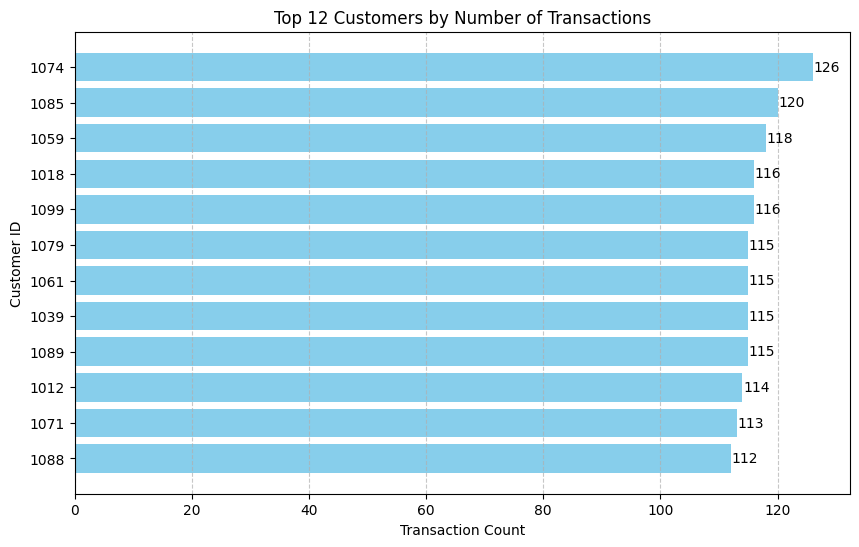

In [ ]:
# Let's look at top n customer which do more transaction
import matplotlib.pyplot as plt

transaction_counts = df['customer_id'].value_counts().reset_index()
transaction_counts.columns = ['customer_id', 'transaction_count']

top_n = int(input('Please enter (top) n number you want to see top n customer:'))
top_customers = transaction_counts.head(top_n)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_customers['customer_id'].astype(str), top_customers['transaction_count'], color='skyblue')
plt.xlabel('Transaction Count')
plt.ylabel('Customer ID')
plt.title(f'Top {top_n} Customers by Number of Transactions')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', va='center')

plt.show()

Please enter (top) n number you want to see top n Merchant:5


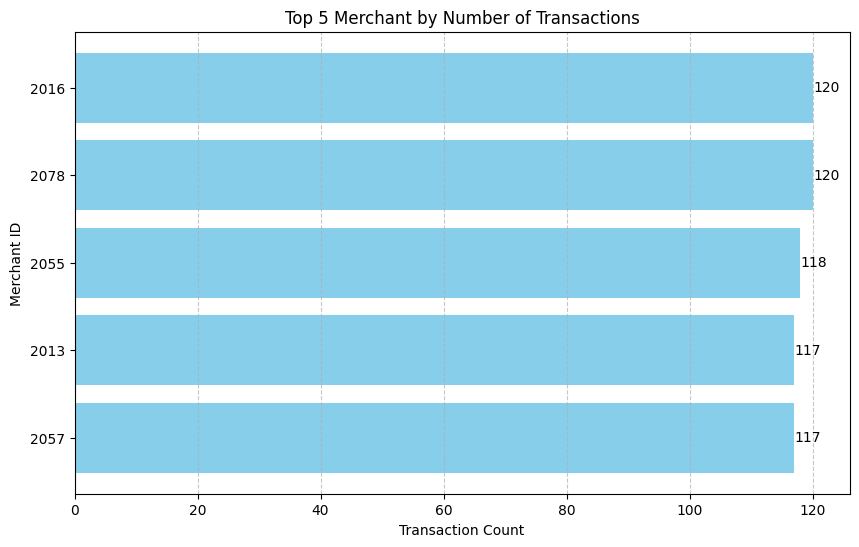

In [ ]:
# Let's look at top n merchant over transactions
transaction_counts = df['merchant_id'].value_counts().reset_index()
transaction_counts.columns = ['merchant_id', 'transaction_count']

top_n = int(input('Please enter (top) n number you want to see top n Merchant:'))
top_customers = transaction_counts.head(top_n)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_customers['merchant_id'].astype(str), top_customers['transaction_count'], color='skyblue')
plt.xlabel('Transaction Count')
plt.ylabel('Merchant ID')
plt.title(f'Top {top_n} Merchant by Number of Transactions')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', va='center')

plt.show()

In [ ]:
# Let's find RFM score for customers
rfm = df.groupby(['customer_id']).aggregate({'transaction_id':'count','amount':'sum'}).reset_index()
rfm.columns = ['customer_id','transaction_count','total_amount']

In [ ]:
# Let's create score of formula
rfm['formula_score'] = rfm['transaction_count'] * rfm['total_amount']

def scale(x):
  min = rfm['formula_score'].min()
  max = rfm['formula_score'].max()
  y = (x - min)/(max - min)
  return y

rfm['formula_score'] = rfm['formula_score'].apply(lambda x: scale(x))

In [ ]:
# Let's create new column rfm score
g1 = np.percentile(rfm['formula_score'], 30)
g2 = np.percentile(rfm['formula_score'], 50)
g3 = np.percentile(rfm['formula_score'], 70)
g4 = np.percentile(rfm['formula_score'], 85)


def rfm_func(x):
    if x < g1:
        return '1'
    elif g1 <= x < g2:
        return f'2'
    elif g2 <= x < g3:
        return f'3'
    elif g3 <= x < g4:
        return f'4'
    else:
        return f'5'

rfm['rfm_score'] = rfm['formula_score'].apply(lambda x: rfm_func(x))

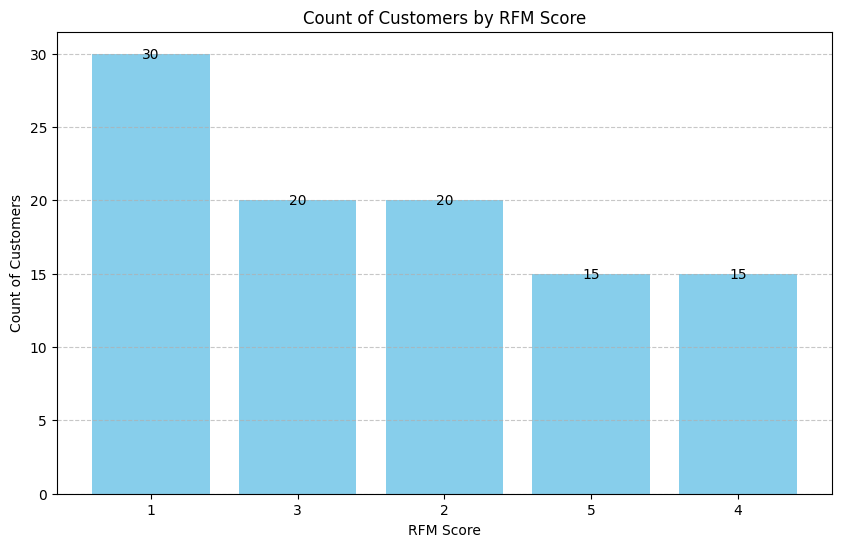

In [ ]:
# Let's look at count of customer by rfm score
rfm_counts = rfm['rfm_score'].value_counts().reset_index()
rfm_counts.columns = ['rfm_score', 'customer_count']

plt.figure(figsize=(10, 6))
bars = plt.bar(rfm_counts['rfm_score'].astype(str), rfm_counts['customer_count'], color='skyblue')
plt.xlabel('RFM Score')
plt.ylabel('Count of Customers')
plt.title('Count of Customers by RFM Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, f'{bar.get_height():.0f}', ha='center', va='bottom')

plt.show()

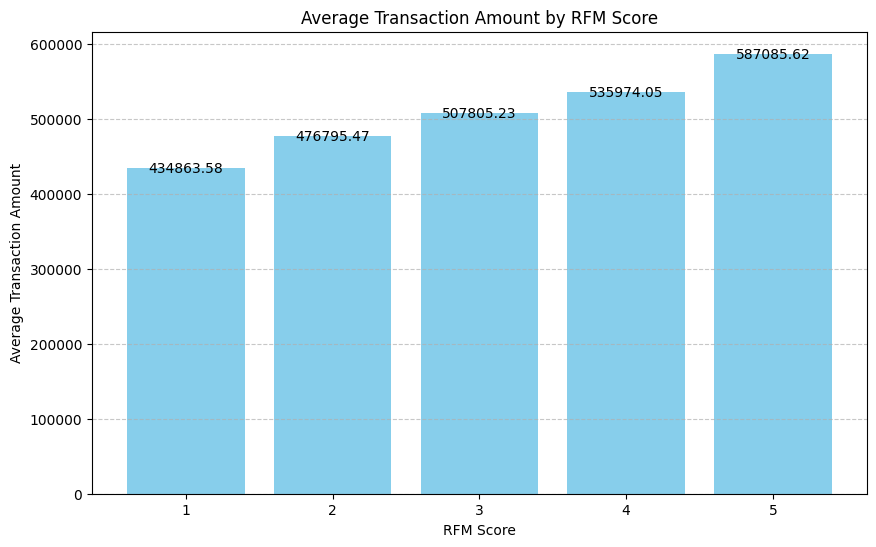

In [ ]:
# Let's look at average amount by rfm score
avg_amount_by_rfm = rfm.groupby('rfm_score')['total_amount'].mean().reset_index()
avg_amount_by_rfm.columns = ['rfm_score', 'average_amount']

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_amount_by_rfm['rfm_score'].astype(str), avg_amount_by_rfm['average_amount'], color='skyblue')
plt.xlabel('RFM Score')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by RFM Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 10000, f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.show()

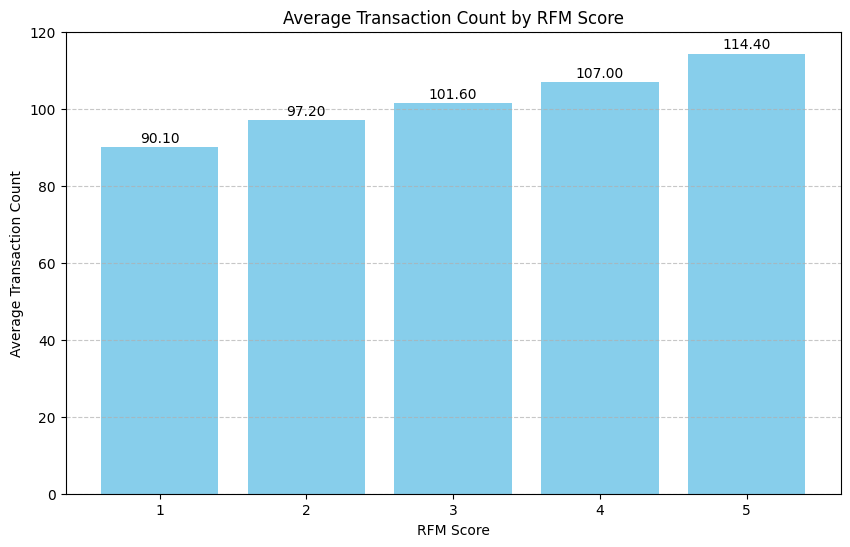

In [ ]:
# Calculate the average transaction count by RFM score
avg_transaction_count_by_rfm = rfm.groupby('rfm_score')['transaction_count'].mean().reset_index()
avg_transaction_count_by_rfm.columns = ['rfm_score', 'average_transaction_count']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_transaction_count_by_rfm['rfm_score'].astype(str), avg_transaction_count_by_rfm['average_transaction_count'], color='skyblue')
plt.xlabel('RFM Score')
plt.ylabel('Average Transaction Count')
plt.title('Average Transaction Count by RFM Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.show()

In [ ]:
# Calculate the average transaction count by RFM score
avg_transaction_count_by_rfm = rfm.groupby('rfm_score')['transaction_count'].mean().reset_index()
avg_transaction_count_by_rfm.columns = ['rfm_score', 'average_transaction_count']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_transaction_count_by_rfm['rfm_score'].astype(str), avg_transaction_count_by_rfm['average_transaction_count'], color='skyblue')
plt.xlabel('RFM Score')
plt.ylabel('Average Transaction Count')
plt.title('Average Transaction Count by RFM Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.show()

In [ ]:
# Let's add rfm['rfm_score'] to df
customer_rfm_dict = dict(zip(rfm['customer_id'], rfm['rfm_score']))
df['rfm_score'] = df['customer_id'].map(customer_rfm_dict)

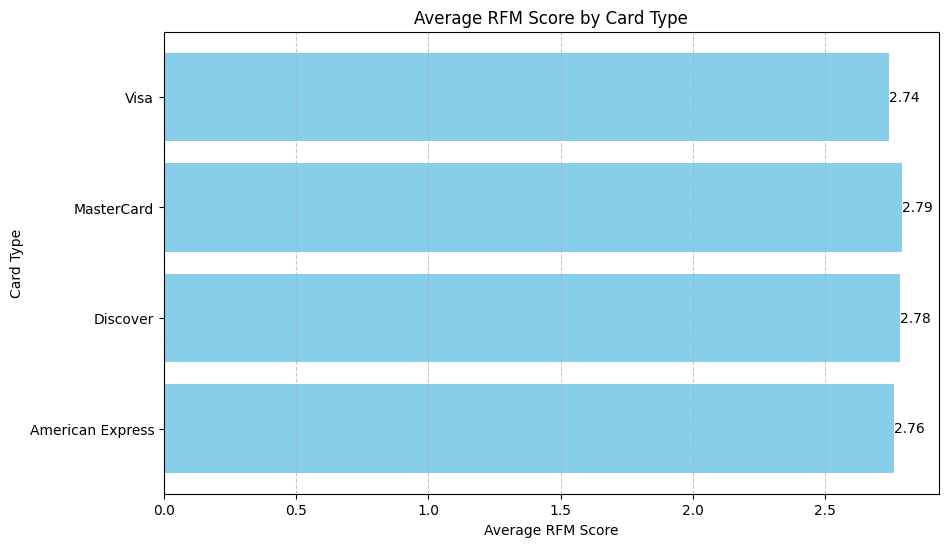

In [ ]:
# Let's group data by 'card_type' and calculate average RFM score
df['rfm_score'] = df['rfm_score'].astype(int)
avg_rfm_by_card_type = df.groupby('card_type')['rfm_score'].mean().reset_index()
avg_fraud_by_card_type = df.groupby('card_type')['is_fraudulent'].mean().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.barh(avg_rfm_by_card_type['card_type'], avg_rfm_by_card_type['rfm_score'], color='skyblue')
plt.xlabel('Average RFM Score')
plt.ylabel('Card Type')
plt.title('Average RFM Score by Card Type')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', ha='left', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

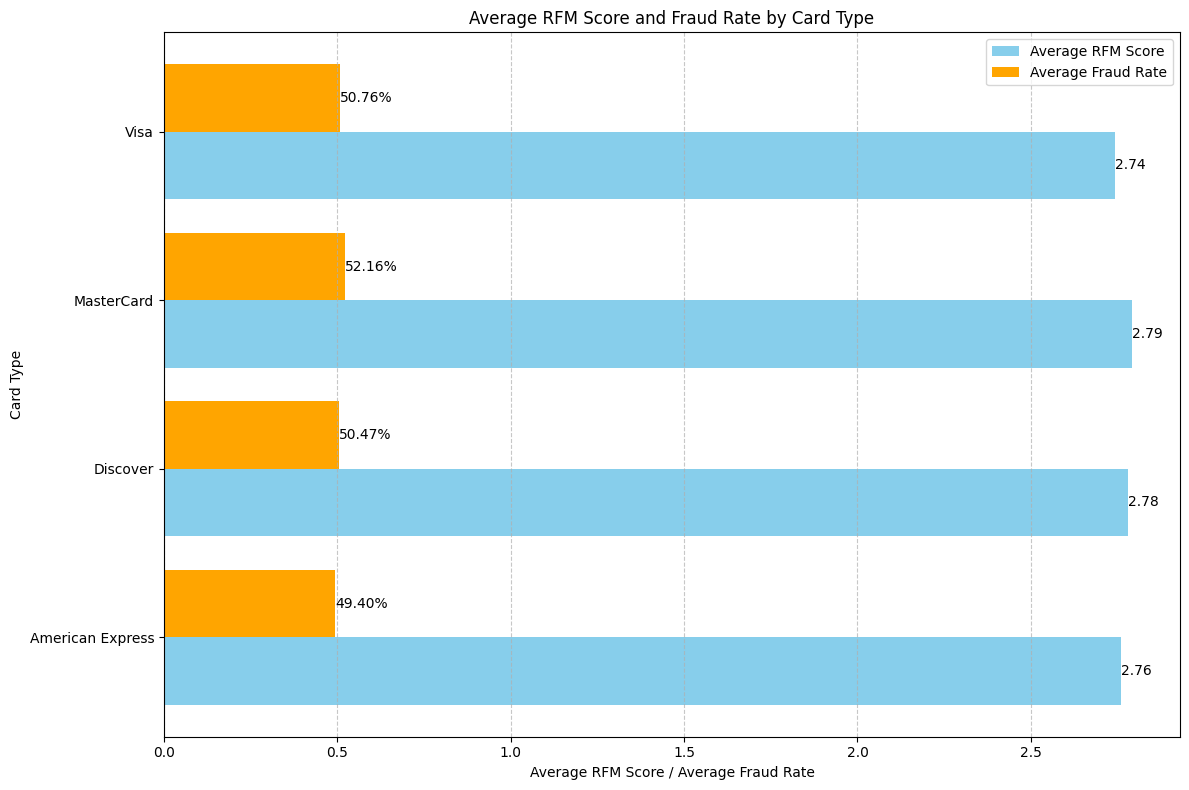

In [ ]:
# Let's group data by 'card_type' and calculate average RFM score and fraud rate
avg_rfm_by_card_type = df.groupby('card_type')['rfm_score'].mean().reset_index()
avg_fraud_by_card_type = df.groupby('card_type')['is_fraudulent'].mean().reset_index()

bar_width = 0.4
index = np.arange(len(avg_rfm_by_card_type['card_type']))
plt.figure(figsize=(12, 8))

plt.barh(index, avg_rfm_by_card_type['rfm_score'], bar_width, color='skyblue', label='Average RFM Score')

plt.barh(index + bar_width, avg_fraud_by_card_type['is_fraudulent'], bar_width, color='orange', label='Average Fraud Rate')

# Add data labels for RFM score
for i, rfm_score in enumerate(avg_rfm_by_card_type['rfm_score']):
    plt.text(rfm_score, i, f'{rfm_score:.2f}', ha='left', va='center')

# Add data labels for fraud rate
for i, fraud_rate in enumerate(avg_fraud_by_card_type['is_fraudulent']):
    plt.text(fraud_rate, i + bar_width, f'{fraud_rate:.2%}', ha='left', va='center', color='black')

plt.xlabel('Average RFM Score / Average Fraud Rate')
plt.ylabel('Card Type')
plt.title('Average RFM Score and Fraud Rate by Card Type')
plt.yticks(index + bar_width / 2, avg_rfm_by_card_type['card_type'])
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Good Insight: Customer's fraud perceptance is more when customer's Rfm score also is more.

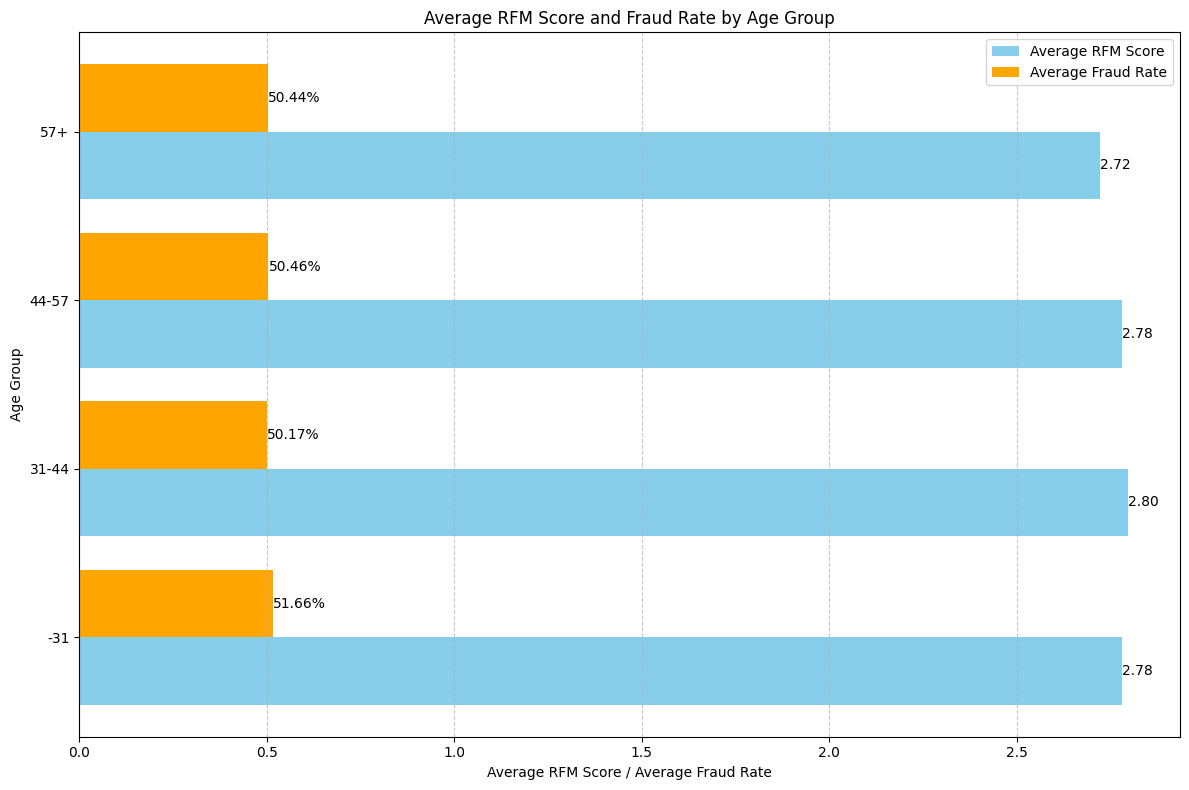

In [ ]:
# Let's group data by 'Age_group' and calculate average RFM score and fraud rate
avg_rfm_by_card_type = df.groupby('Age_group')['rfm_score'].mean().reset_index()
avg_fraud_by_card_type = df.groupby('Age_group')['is_fraudulent'].mean().reset_index()

bar_width = 0.4
index = np.arange(len(avg_rfm_by_card_type['Age_group']))
plt.figure(figsize=(12, 8))

plt.barh(index, avg_rfm_by_card_type['rfm_score'], bar_width, color='skyblue', label='Average RFM Score')

plt.barh(index + bar_width, avg_fraud_by_card_type['is_fraudulent'], bar_width, color='orange', label='Average Fraud Rate')

# Add data labels for RFM score
for i, rfm_score in enumerate(avg_rfm_by_card_type['rfm_score']):
    plt.text(rfm_score, i, f'{rfm_score:.2f}', ha='left', va='center')

# Add data labels for fraud rate
for i, fraud_rate in enumerate(avg_fraud_by_card_type['is_fraudulent']):
    plt.text(fraud_rate, i + bar_width, f'{fraud_rate:.2%}', ha='left', va='center', color='black')

plt.xlabel('Average RFM Score / Average Fraud Rate')
plt.ylabel('Age Group')
plt.title('Average RFM Score and Fraud Rate by Age Group')
plt.yticks(index + bar_width / 2, avg_rfm_by_card_type['Age_group'])
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

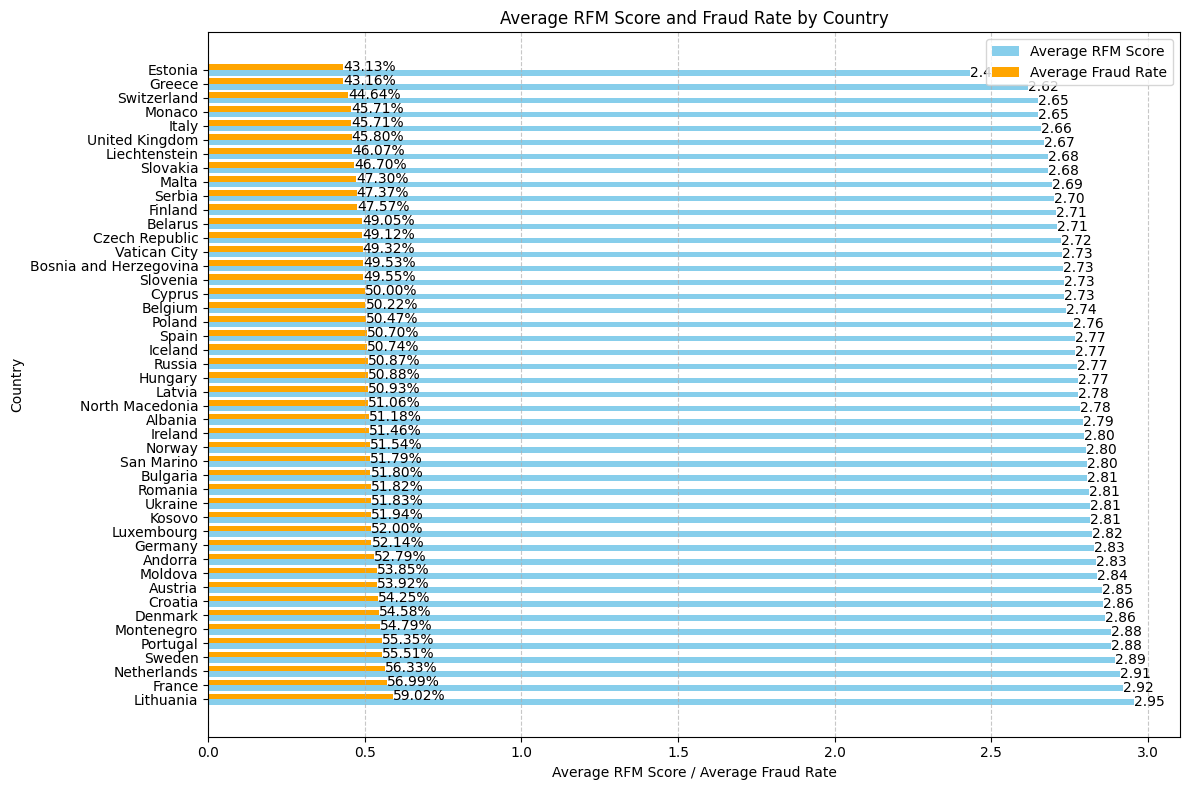

In [ ]:
# Let's group data by 'country' and calculate average RFM score and fraud rate
avg_rfm_by_country = df.groupby('country')['rfm_score'].mean().reset_index()
avg_fraud_by_country = df.groupby('country')['is_fraudulent'].mean().reset_index()

avg_rfm_by_country = avg_rfm_by_country.sort_values(by='rfm_score', ascending=False)

avg_fraud_by_country = avg_fraud_by_country.sort_values(by='is_fraudulent', ascending=False)

bar_width = 0.4
index = np.arange(len(avg_rfm_by_country['country']))
plt.figure(figsize=(12, 8))

plt.barh(index, avg_rfm_by_country['rfm_score'], bar_width, color='skyblue', label='Average RFM Score')

plt.barh(index + bar_width, avg_fraud_by_country['is_fraudulent'], bar_width, color='orange', label='Average Fraud Rate')

for i, rfm_score in enumerate(avg_rfm_by_country['rfm_score']):
    plt.text(rfm_score, i, f'{rfm_score:.2f}', ha='left', va='center')

for i, fraud_rate in enumerate(avg_fraud_by_country['is_fraudulent']):
    plt.text(fraud_rate, i + bar_width, f'{fraud_rate:.2%}', ha='left', va='center', color='black')

plt.xlabel('Average RFM Score / Average Fraud Rate')
plt.ylabel('Country')
plt.title('Average RFM Score and Fraud Rate by Country')
plt.yticks(index + bar_width / 2, avg_rfm_by_country['country'])
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


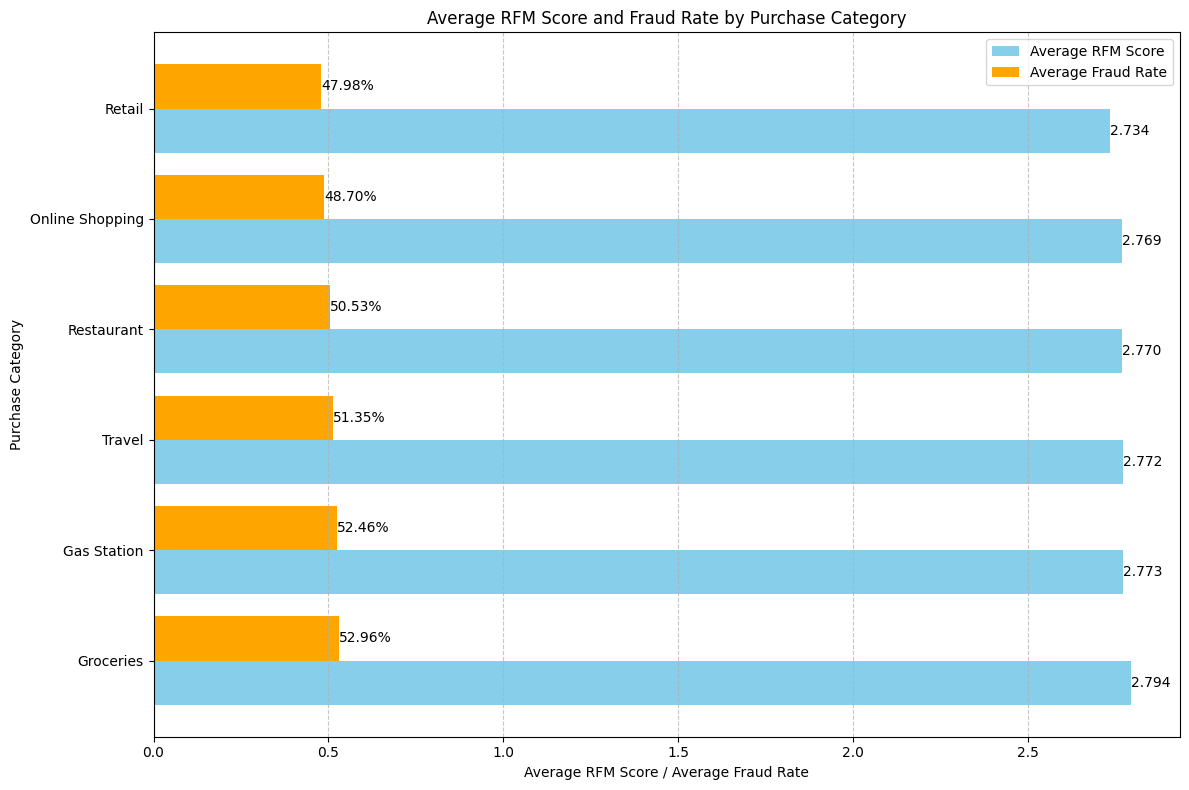

In [ ]:
# Let's group data by 'purchase_category' and calculate average RFM score and fraud rate
avg_rfm_by_purchase_category = df.groupby('purchase_category')['rfm_score'].mean().reset_index()
avg_fraud_by_purchase_category = df.groupby('purchase_category')['is_fraudulent'].mean().reset_index()

avg_rfm_by_purchase_category = avg_rfm_by_purchase_category.sort_values(by='rfm_score', ascending=False)
avg_fraud_by_purchase_category = avg_fraud_by_purchase_category.sort_values(by='is_fraudulent', ascending=False)

bar_width = 0.4
index = np.arange(len(avg_rfm_by_purchase_category['purchase_category']))
plt.figure(figsize=(12, 8))

plt.barh(index, avg_rfm_by_purchase_category['rfm_score'], bar_width, color='skyblue', label='Average RFM Score')
plt.barh(index + bar_width, avg_fraud_by_purchase_category['is_fraudulent'], bar_width, color='orange', label='Average Fraud Rate')

for i, rfm_score in enumerate(avg_rfm_by_purchase_category['rfm_score']):
    plt.text(rfm_score, i, f'{rfm_score:.3f}', ha='left', va='center')

for i, fraud_rate in enumerate(avg_fraud_by_purchase_category['is_fraudulent']):
    plt.text(fraud_rate, i + bar_width, f'{fraud_rate:.2%}', ha='left', va='center', color='black')

plt.xlabel('Average RFM Score / Average Fraud Rate')
plt.ylabel('Purchase Category')
plt.title('Average RFM Score and Fraud Rate by Purchase Category')
plt.yticks(index + bar_width / 2, avg_rfm_by_purchase_category['purchase_category'])
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

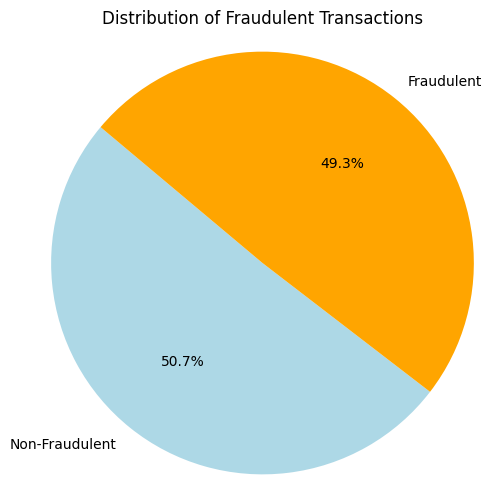

In [ ]:
# Let's count the number of fraudulent transactions
fraud_counts = df['is_fraudulent'].value_counts()

labels = ['Non-Fraudulent', 'Fraudulent']

colors = ['lightblue', 'orange']

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fraudulent Transactions')
plt.axis('equal')
plt.show()

# Data Preprocessing For Model


In [4]:
df = pd.read_csv('/content/synthetic_financial_data.csv')

In [5]:
# Let's remove Unnecessary Columns
df.drop(['transaction_id','customer_id','transaction_description','merchant_id','transaction_time','location'], axis = 1, inplace = True)

In [6]:
fraud_mean_by_country = df.groupby('country').aggregate({'is_fraudulent': 'mean'})
fraud_mean_by_country_dict = fraud_mean_by_country['is_fraudulent'].to_dict()

In [7]:
df['country'] = df['country'].map(fraud_mean_by_country_dict)

In [8]:
# Let's create new column from age column
def group(x):
  if x < 33:
    a = '18-32'
  elif x < 60:
    a = '33-60'
  elif x >= 60:
    a = '60+'
  return a

df['Age_group'] = df['customer_age'].apply(lambda x: group(x))

In [9]:
df = pd.get_dummies(df,columns=['card_type','purchase_category','Age_group'],drop_first=True,dtype=float)

In [10]:
for i in df.columns:
  df[i] = df[i].astype(int)

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df.drop(columns=['is_fraudulent'])
y = df['is_fraudulent']

xc = sm.add_constant(x)
xc = xc.loc[:, ~xc.columns.duplicated()]

def calculate_vif(df):
    vif = pd.DataFrame()
    vif["feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Iteratively remove features with high VIF
threshold = 10
while True:
    vif_data = calculate_vif(xc)
    max_vif = vif_data['VIF'].max()
    if max_vif > threshold:
        feature_to_remove = vif_data.sort_values('VIF', ascending=False).iloc[0]['feature']
        xc = xc.drop(columns=[feature_to_remove])
    else:
        break

xc = xc.loc[:, (xc != xc.iloc[0]).any()]

try:
    model = sm.Logit(y, xc).fit()
    print(model.summary())
except np.linalg.LinAlgError as e:
    print(f"An error occurred: {e}")

print("\nFinal VIF values after feature selection:")
print(calculate_vif(xc))

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Optimization terminated successfully.
         Current function value: 0.692143
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:          is_fraudulent   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Thu, 30 May 2024   Pseudo R-squ.:                0.001315
Time:                        14:33:11   Log-Likelihood:                -6921.4
converged:                       True   LL-Null:                       -6930.5
Covariance Type:            nonrobust   LLR p-value:                   0.05116
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
amount                             5.909e-06   6.21e-06      0

In [ ]:
from sklearn.decomposition import PCA

X = df[['purchase_category_Groceries','purchase_category_Retail',
       'purchase_category_Travel', 'Age_group_33-60', 'Age_group_60+']]
y = df['is_fraudulent']

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

df.drop(columns=['customer_age',
       'card_type_Discover', 'card_type_Visa',
       'purchase_category_Groceries','purchase_category_Retail',
       'purchase_category_Travel', 'Age_group_33-60', 'Age_group_60+'], inplace=True)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df.drop(columns=['is_fraudulent'])
y = df['is_fraudulent']

xc = sm.add_constant(x)
xc = xc.loc[:, ~xc.columns.duplicated()]

# Iteratively remove features with high VIF
threshold = 10
while True:
    vif_data = calculate_vif(xc)
    max_vif = vif_data['VIF'].max()
    if max_vif > threshold:
        feature_to_remove = vif_data.sort_values('VIF', ascending=False).iloc[0]['feature']
        xc = xc.drop(columns=[feature_to_remove])
    else:
        break

xc = xc.loc[:, (xc != xc.iloc[0]).any()]

try:
    model = sm.Logit(y, xc).fit()
    print(model.summary())
except np.linalg.LinAlgError as e:
    print(f"An error occurred: {e}")

Optimization terminated successfully.
         Current function value: 0.692248
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:          is_fraudulent   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 May 2024   Pseudo R-squ.:                0.001165
Time:                        13:00:44   Log-Likelihood:                -6922.5
converged:                       True   LL-Null:                       -6930.5
Covariance Type:            nonrobust   LLR p-value:                  0.006452
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
amount                             8.123e-06   4.26e-06      1

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


# Modelling

In [12]:
# Let's define target and input value
X = df.drop('is_fraudulent', axis =1)
y = df['is_fraudulent']

In [13]:
# Let's divide dataset to train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Let's create models
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Define classifiers
classifiers = {
    "Support Vector Classifier": SVC(probability=True),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
}

# Train classifiers and print training scores
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier:", key, "has a training score of", round(training_score.mean() * 100, 2), "% accuracy score")

Classifier: Support Vector Classifier has a training score of 49.1 % accuracy score
Classifier: DecisionTreeClassifier has a training score of 51.01 % accuracy score
Classifier: RandomForestClassifier has a training score of 50.42 % accuracy score
Classifier: XGBoost has a training score of 50.65 % accuracy score
Classifier: GradientBoosting has a training score of 50.56 % accuracy score


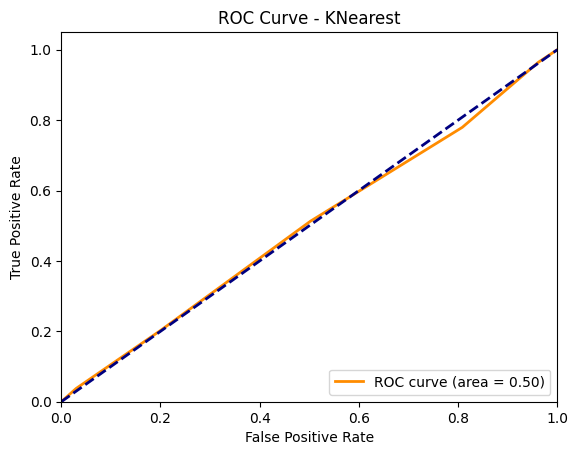

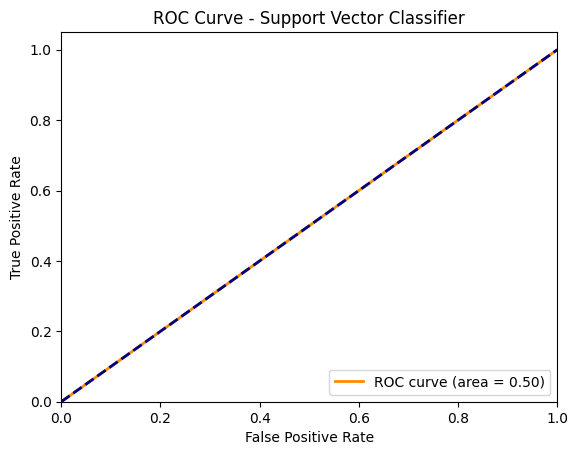

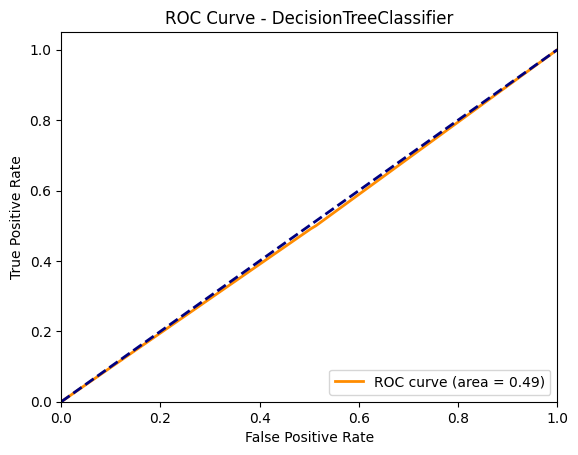

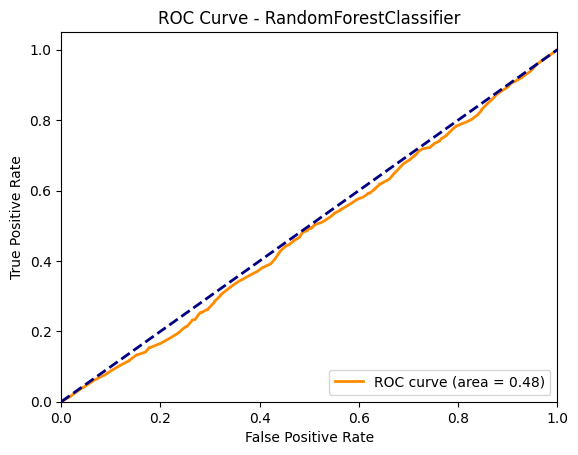

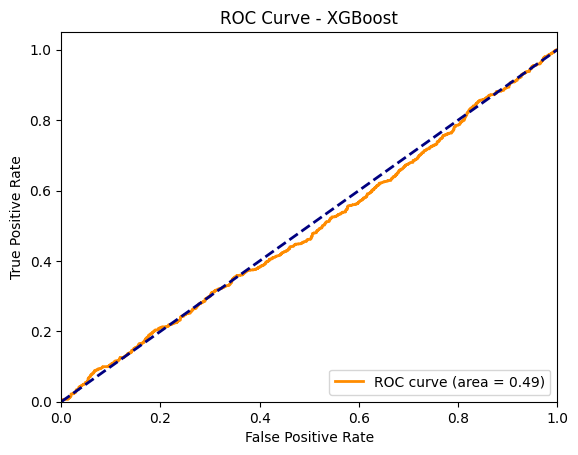

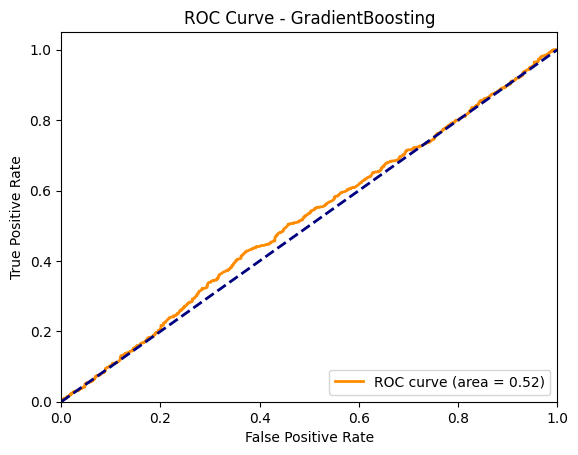

In [ ]:
# Let's evaluate
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train classifiers and evaluate performance with ROC-AUC
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + key)
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Train classifiers and evaluate performance with ROC-AUC
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_score = classifier.predict_proba(X_test)[:,1]

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute classification report
    report = classification_report(y_test, y_pred)

    # Plot ROC curve
    plt.figure()
    lw = 2

    # Output metrics
    print("Metrics for", key)
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)
    print("\n\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Support Vector Classifier
Confusion Matrix:
[[   0  966]
 [   0 1034]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       966
           1       0.52      1.00      0.68      1034

    accuracy                           0.52      2000
   macro avg       0.26      0.50      0.34      2000
weighted avg       0.27      0.52      0.35      2000




Metrics for DecisionTreeClassifier
Confusion Matrix:
[[481 485]
 [530 504]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       966
           1       0.51      0.49      0.50      1034

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000




Metrics for RandomForestClassifier
Confusion Matrix:
[[484 482]
 [528 506]]

Classification Report:
              precision    recall

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Neural Network

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/10
640/640 [==============================] - 4s 4ms/step - loss: 0.7239 - accuracy: 0.5097 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 2/10
640/640 [==============================] - 3s 5ms/step - loss: 0.6984 - accuracy: 0.5038 - val_loss: 0.6941 - val_accuracy: 0.4994
Epoch 3/10
640/640 [==============================] - 2s 4ms/step - loss: 0.6954 - accuracy: 0.5039 - val_loss: 0.6930 - val_accuracy: 0.5063
Epoch 4/10
640/640 [==============================] - 3s 4ms/step - loss: 0.6940 - accuracy: 0.5023 - val_loss: 0.6930 - val_accuracy: 0.4938
Epoch 5/10
640/640 [==============================] - 2s 3ms/step - loss: 0.6942 - accuracy: 0.5036 - val_loss: 0.6930 - val_accuracy: 0.4969
Epoch 6/10
640/640 [==============================] - 2s 2ms/step - loss: 0.6940 - accuracy: 0.5017 - val_loss: 0.6928 - val_accuracy: 0.5163
Epoch 7/10
640/640 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5059 - val_loss: 0.6930 - val_accuracy: 0.5156
Epoch 

# Deploy

In [21]:
# Let's import dataframe
df = pd.read_csv('/content/synthetic_financial_data.csv')

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Let's remove Unnecessary Columns
df.drop(['transaction_id','customer_id','transaction_description','merchant_id','transaction_time','location'], axis = 1, inplace = True)

fraud_mean_by_country = df.groupby('country').aggregate({'is_fraudulent': 'mean'})
fraud_mean_by_country_dict = fraud_mean_by_country['is_fraudulent'].to_dict()

df['country'] = df['country'].map(fraud_mean_by_country_dict)

# Let's create new column from age column
def group(x):
  if x < 33:
    a = '18-32'
  elif x < 60:
    a = '33-60'
  elif x >= 60:
    a = '60+'
  return a

df['Age_group'] = df['customer_age'].apply(lambda x: group(x))

df = pd.get_dummies(df,columns=['card_type','purchase_category','Age_group'],drop_first=True,dtype=float)


from sklearn.decomposition import PCA

X = df[['purchase_category_Groceries','purchase_category_Retail',
       'purchase_category_Travel', 'Age_group_33-60', 'Age_group_60+']]
y = df['is_fraudulent']

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

df.drop(columns=['customer_age',
       'card_type_Discover', 'card_type_Visa',
       'purchase_category_Groceries','purchase_category_Retail',
       'purchase_category_Travel', 'Age_group_33-60', 'Age_group_60+'], inplace=True)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

for i in df.columns:
  df[i] = df[i].astype(int)


# Split data into features (X) and target (y)
X = df.drop('is_fraudulent', axis=1)
y = df['is_fraudulent']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

# Train classifiers and print training scores
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
training_score = cross_val_score(model, X_train, y_train, cv=5)
print("Classifier: Decision Tree Classifier", "has a training score of", round(training_score.mean() * 100, 2), "% accuracy score")

Decision Tree Accuracy: 0.496
Classifier: Decision Tree Classifier has a training score of 50.92 % accuracy score


In [23]:
import pickle
import json

with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

with open('pca_model.pkl', 'wb') as file:
    pickle.dump(pca, file)

with open('fraud_mean_by_country.json', 'w') as json_file:
    json.dump(fraud_mean_by_country_dict, json_file)

print("Model saved successfully.")

Model saved successfully.


### Example

In [24]:
# Let's take an example from the test set (the first example)
example_index = 0
example = X_test.iloc[[example_index]]

# Predict using the decision tree classifier
prediction = clf.predict(example)

# print("Example features:", example)
print("Predicted class:", prediction)

Predicted class: [0]


## Gradio Deploy

In [18]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.0 MB/s e

In [25]:
import pandas as pd
# Let's import dataframe
df = pd.read_csv('/content/synthetic_financial_data.csv')

In [26]:
import pandas as pd
import gradio as gr
import json
import pickle
from sklearn.decomposition import PCA

# Load the JSON file
with open('fraud_mean_by_country.json', 'r') as json_file:
    fraud_mean_by_country_dict = json.load(json_file)

# Load the decision tree model
with open("decision_tree_model.pkl", "rb") as file:
    clf = pickle.load(file)

# Load PCA model
with open("pca_model.pkl", "rb") as file:
    pca = pickle.load(file)

# Let's dummy data for generating choices
df = pd.read_csv('synthetic_financial_data.csv')

# Let's create new column from age column
def group(x):
  if x < 33:
    a = '18-32'
  elif x < 60:
    a = '33-60'
  elif x >= 60:
    a = '60+'
  return a

# Choices for dropdown menus
card_type_choices = [(val, val) for val in df['card_type'].unique()]
location_choices = [(val, val) for val in df['location'].unique()]
purchase_category_choices = [(val, val) for val in df['purchase_category'].unique()]
country_choices = [(val, val) for val in df['country'].unique()]

# Function to predict
def predict(transaction_id, customer_id, merchant_id, amount, transaction_time, card_type, location, purchase_category, customer_age, transaction_description, country):
    try:
        data = pd.DataFrame({
            'amount': [amount],
            'country': [country],
            'customer_age': [customer_age],
            'card_type': [card_type],
            'purchase_category': [purchase_category]
        })
        data = pd.get_dummies(data, columns=['card_type', 'purchase_category'])
        data['country'] = data['country'].map(fraud_mean_by_country_dict)
        data['Age_group'] = data['customer_age'].apply(lambda x: group(x))
        data = pd.get_dummies(data, columns=['Age_group'], drop_first=True, dtype=float)

        columns_to_add = ['customer_age','card_type_MasterCard','card_type_Discover', 'card_type_Visa','purchase_category_Online Shopping',
                          'purchase_category_Groceries', 'purchase_category_Restaurant','purchase_category_Retail', 'purchase_category_Travel','purchase_category_Gas Station'
                          ,'Age_group_33-60', 'Age_group_60+']

        # Add missing columns with default value of 0
        for column in columns_to_add:
            if column not in data.columns:
                data[column] = 0

        for i in data.columns:
          data[i] = data[i].astype(int)

        # Perform PCA
        X_pca = pca.transform(data[['purchase_category_Groceries', 'purchase_category_Retail', 'purchase_category_Travel', 'Age_group_33-60', 'Age_group_60+']])
        data['pca1'] = X_pca[:, 0]
        data['pca2'] = X_pca[:, 1]

        data.drop(columns=['customer_age', 'card_type_Discover', 'card_type_Visa', 'purchase_category_Groceries', 'purchase_category_Retail', 'purchase_category_Travel', 'Age_group_33-60', 'Age_group_60+'], inplace=True)
        # Make predictions
        data = data[['amount', 'country', 'card_type_MasterCard','purchase_category_Online Shopping', 'purchase_category_Restaurant','pca1', 'pca2']]
        prediction = clf.predict(data)
        result = "Fraud ❌" if prediction[0] == 1 else "Not Fraud ✅"
        # Custom output for specific IDs
        return f'Customer with ID {customer_id} and Transaction ID {transaction_id}, which happened at {transaction_time}, is {result}'
    except Exception as e:
        return str(e)

# Define Gradio interface
inputs = [
    gr.Textbox(label="Transaction ID"),
    gr.Textbox(label="Customer ID"),
    gr.Textbox(label="Merchant ID"),
    gr.Number(label="Amount"),
    gr.Textbox(label="Transaction Date (YYYY-MM-DD)"),
    gr.Dropdown(choices=card_type_choices, label="Card Type"),
    gr.Dropdown(choices=location_choices, label="Location"),
    gr.Dropdown(choices=purchase_category_choices, label="Purchase Category"),
    gr.Number(label="Customer Age"),
    gr.Textbox(label="Transaction Description"),
    gr.Dropdown(choices=country_choices, label="Country")
]

# Define Gradio interface
gr.Interface(fn=predict, inputs=inputs, outputs="text").launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0a2b4481c6794a9aea.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# The End